# Lab 01 : Root Finding

#### Objectives

The main objectives of this lab are as follows.

- Learn that solving numerical problems requires a lot of analytic work too! This is a necessary feature! Computational techniques are an additional tool we use when solving problems, not a replacement for the analytic tools we already know.
- Study root finding using functions from `scipy.optimize`.
- Learn more about making good plots by creating our first real one!
- Become more comfortable using the built-in documentation by always you looking up the documentation on new functions.

## Initialization

Put all the initialization in the cell below. This should include loading `numpy` and setting up plotting (loading the required module). It should also include loading `scipy.optimize`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

## Problem Statement

Here we will solve the following problem. Consider a water hose with initial water velocity, $v$, aimed at an angle, $\alpha$, with respect to the ground, targeting a fire a height, $h$, above the ground. It can be shown that to hit the target the horizontal distance, $x$, between the nozzle and the fire satisfies the quadratic equation
$$ \frac{g}{2v^2\cos^2\alpha} x^2 - x \tan\alpha + h = 0. $$
Our goal is to find the optimal angle, $\alpha_O$, at which to aim the hose such that we hit the fire from the maximum distance away, $x_{\mathrm{max}}$.

Throughout this lab we will use $g=9.8\;\mathrm{m/s^2}$.

(*Note:* "It can be shown" means that you know how to do this and should think about how you would do it, but you are not being asked to do it here.)

$$ \frac{gx^2}{2v^2} - x \tan\alpha\cos^2\alpha + h\cos^2\alpha = 0. $$

## Preliminaries

We have a problem and we are taking a course in computational physics so our first thought is probably to start typing away hoping that the computer will produce answers. *This is the wrong approach!* In fact, we need to spend a fair bit of time doing analytic work to
1. manipulate the system to answer specific questions,
2. turn these manipulations into a form the computer can handle,
3. calculate simple cases to test the numerical results,
4. deal with any "numerical issues".

To begin, the system described in the problem statement is a familiar one. It really has nothing to do with the flow of water. It is a topic studied extensively in introductory physics. When solving numerical problems it is important to understand the physics of the system being studied. This allows us to use our intuition to determine whether results produced by our codes make sense or not. Remember that a computer does what we tell it to do, which is often not what we want it to do! Thus we need to break our analysis down into small, understandable steps and constantly ask whether or not the results at each step make sense.

What well known physics topic is this problem really about? (*Note:* If it is not immediate obvious then come back to this question after working on some of the other parts.)

projectile motion

## Test Case

As stated above, it is essential to have a test case (or preferably more than one) in mind whenever solving a problem. You will see in future labs that you are first asked to solve a known case before applying your technique to unknown cases which cannot be solved analytically. Though correctly solving a simpler problem is not a guarantee that your technique will work for more complicated problems, at least it gives you some confidence. On the other hand, if your technique does not work for a simple problem, there is no reason to believe it works for a complicated one!

Here we will start with the simple case of starting and ending at the same height, $h=0$. This is a problem you have solved before!

For $h=0$, state the optimal angle, $\alpha_O$, that leads to the maximum distance the water travels, $x_{\mathrm{max}}$. Also calculate $x_{\mathrm{max}}$. Specify your answers below. (*Note:* As you have seen in notebooks, we can insert full documentation including nicely formatted equations using LaTeX. We will discuss some basic LaTeX in the future. If you already know how, great, show the rest of the members of your group! Regardless, just make sure your answers can be clearly understood however you choose to write them.)

We take the equation of the hose above, set the h term to 0 (because there is no height offset between the start and end) and solve it for x:
$$ x=\frac{2\tan(\alpha)v^2\cos^2(\alpha)}{g} $$
We take the derivative of x with respect to $\alpha$, and set it equal to 0 to optimize:
$$ \frac{\partial x}{\partial \alpha} = \frac{2v^2\cos(2\alpha)}{g} = 0 $$
which yields 
$$\alpha = \frac{\pi}{4}.

## Solving the Problem

We are now ready to think about the general problem. We will begin by *analytically* solving the quadratic equation for $x(\alpha)$. Even this simple step is fraught with danger. If we blindly apply the solution we know to quadratic equations we will encounter a problem.

Naively solving the quadratic equation would give us terms in the solution that include contributions proportional to $1/\cos^2\alpha$. Numerically, why is having $\cos\alpha$ in the denominator a problem? What would happen if we try to evaluate such a term for all values of the angle with $0\le\alpha\le\pi$?

$\cos(\frac{\pi}{2})=0$, which means we would be dividing by 0 if we tried to evaluate within the given range.

To deal with the problem noted above it is probably best to multiply the quadratic equation by $\cos^2\alpha$ and use that as our base equation. In fact, we could go further than this. It may be more elegant to rewrite the equation in terms of $\sin(2\alpha)$ and $\cos(2\alpha)$ using double angle formulas. *Or it may not!* How far we go in manipulating the equations analytically is up to us and is a balance between wanting to have simple, easy to read and implement equations, and minimizing the amount of time we spend manipulating an equation that is going to be solved numerically anyway. *Decide as a group how much you want to simplify the equation.*

Analytically solve the modified quadratic equation for $x(\alpha)$ and write it in a form that can be evaluated numerically. Since we have yet to discuss how to typeset such equations, we will instead only define it as a function. Define a function that given $\alpha$, $h$, and $v$, returns the solution. Of course, since we are solving a quadratic equation we know **there are two solutions**. To account for this, write a function based on the template
```
def xalpha(alpha, h, v, sgn=+1):
``` 

Here `sgn` refers to the "$\pm$" that appears in the solution to a quadratic equation. By default we choose the "$+$" solution, but can get the "$-$" solution by passing in `-1`. In other words, your function should be able to return either the "+" or "-" solution from the quadratic equation depending on whether sgn=+1 or sgn=-1.

Further, this function should be used by a human. As a human we typically express angles in degrees. This is not how a computer expresses angles; it wants radians (see the documentation for the sine function). Your function should accept `alpha` in degrees.

Finally, any non-trivial function must have documentation! Here you are given the documentation, make sure your function is consistent with it! In the future you must provide this documentation yourself. The general idea is that when you come back and look at this function in a week or month or ... will you immediately be able to tell what it is doing without having to go through the whole lab again?

In [2]:
def xalpha(alpha, h, v, sgn=+1):
    """Distance as a function of angle, alpha, for a projectile with speed v
    to hit a target at height h.
    Input: 
      alpha: launch angle in degrees,
      h: height of target in meters,
      v: speed of projectile in m/s,
      sgn : (optional) +1 or -1, determines which solution of the quadratic equation to calculate.
    Output:
      x distance: in meters
    """
    alpha=np.radians(alpha)
    return ((v**2)/9.8)*(np.sin(alpha)*np.cos(alpha)+sgn*(np.sqrt(((np.sin(alpha))**2*(np.cos(alpha))**2)-(2*9.8*h*(np.cos(alpha))**2)/v**2)))

To test your function, print the two solutions for $h=0$ along with the expected results. These must agree! If they do not, go back and figure out why not! (*Note:* You were not told $v$, why not? What should you do in this case?)

In [3]:
print(xalpha(45, 0, 1), "meters")
print(xalpha(45, 0, 1, sgn=-1), "meters")

0.10204081632653063 meters
0.0 meters


Finally, we want to find the optimal angle. We know that we can find extrema using derivatives. In particular here we wish to find $\alpha_O$ such that
$$ \left. \frac{\mathrm{d}x}{\mathrm{d}\alpha} \right|_{\alpha=\alpha_O} = 0. $$

Since we just solved for $x(\alpha)$ our first thought might be take the derivative of it with respect to $\alpha$. *Do not do this!* That is quite painful, there must be an easier way. Just because we are doing some manipulations analytically that does not mean we need to do them in a difficult way! A much simpler approach is to *implicitly differentiate* the original quadratic equation using the fact that the derivative of $x$ with respect to $\alpha$ when evaluated at $\alpha_O$ is zero. Actually, we should differentiate the modified form of the quadratic equation used above to solve for $x(\alpha)$ (the one without the $\cos\alpha$ in the denominator). Do so to find an equation of the form $f(\alpha_O)=0$ which can be solved using a root finder. Note that you will also have $x(\alpha_O)$ appearing in your equation. This is fine, and actually preferred. Such an equation is easy for us to understand. It is also easy for the computer since we have already defined a function for $x(\alpha)$.

Calculate an equation of the form $f(\alpha_O)=0$ that can be solved to find the optimal angle $\alpha_O$. Define the function $f(\alpha_O)$ of the form
```
def optimal_f(alpha, h, v, sgn=+1):
```
similar to `xalpha` defined above. Make sure you write it in a form that works for all allowed values of `alpha`.
Finally, do not forget to document your function.

$$ x(\alpha)(1-2\sin^2(\alpha))+2h\cos(\alpha)\sin(\alpha)=0

In [4]:
def optimal_f(alpha, h, v, sgn=+1):
    alpha=np.radians(alpha)
    """Derivative of distance (with respect to angle alpha) as a function of alpha, for a projectile with speed v
    to hit a target at height h. To be used in an optimization function (such as scipy.optimize.brentq)
    to find the angle alpha that maximizes distance travelled. 
    Input: 
      alpha: launch angle in degrees,
      h: height of target in meters,
      v: speed of projectile in m/s,
      sgn : (optional) +1 or -1, determines which solution of the quadratic equation to calculate.
    Output:
      Value of the derivative at a some angle value alpha. 
    """
    return xalpha(np.rad2deg(alpha), h, v)*(1-2*(np.sin(alpha))**2)+2*h*np.cos(alpha)*np.sin(alpha)

Verify your function `optimal_f` works by numerically finding the optimal angle when $h=0$. Print your result along with the expected one. Again, these **must agree**.

In [5]:
print("Expected value: ", 45, "degrees")
print("Numerically calculated value: ", opt.brentq(optimal_f, 30, 60, args=(0,1)), "degrees")
print("limited precision :(")

Expected value:  45 degrees
Numerically calculated value:  45.00000000000001 degrees
limited precision :(


## Application

Now that we have code that works for a known case, let us apply it to another case. Suppose we wish to put out a fire a height $10.3\;\mathrm{m}$ above a nozzle that projects water with a speed of $16.7\;\mathrm{m/s}$. 

Let us first see what $x(\alpha)$ looks like. Produce a quick plot of $x(\alpha)$ for $0\le\alpha\le 180$ in degrees. Include both solutions in the plot.

C:\Users\sophi\AppData\Local\Temp\ipykernel_14228\2410153960.py:13: RuntimeWarning: invalid value encountered in sqrt
  return ((v**2)/9.8)*(np.sin(alpha)*np.cos(alpha)+sgn*(np.sqrt(((np.sin(alpha))**2*(np.cos(alpha))**2)-(2*9.8*h*(np.cos(alpha))**2)/v**2)))


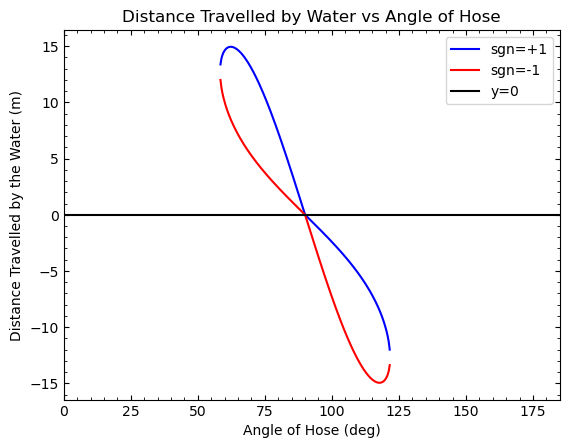

In [6]:
x=np.linspace(0,180,500)
y=xalpha(x,10.3,16.7)
y2=xalpha(x,10.3,16.7,-1)

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x,y, label="sgn=+1",c='b')
ax.plot(x,y2, label="sgn=-1",c='r')
ax.set_xlim(0,185)
ax.axhline(0, c='k', label='y=0')
ax.set_xlabel("Angle of Hose (deg)")
ax.set_ylabel('Distance Travelled by the Water (m)')
ax.set_title("Distance Travelled by Water vs Angle of Hose")
ax.legend()

This was a nice idea, but now we need to understand what just happened. Firstly, you probably received a warning message (red box) before the plot was created. Secondly, the plot does not run over the full range of angles we specified. Thirdly, there are negative distances! We need to fully understand and explain this plot before we can really trust our code. If things do not make sense then there is a good chance we have something wrong in the code. Note that "understand" and "explain" means both *numerically* and *physically*. After all, we are solving a physical problem!

Assuming there was one, explain the source of the warning message (just because it is only a warning that does not mean we can ignore it), why the plot does not extend over the full range of angles, and why the distance changes sign when $\alpha>90^\circ$. Finally, which solution produces the maximum distance over the angles of interest, when `sgn=+1` or when `sgn=-1`?

The source of the RuntimeWarning is that the inputs at the start of the range cause the radicand in `xalpha()` to be negative, resulting in `nan` values in the array storing distances. This is also the reason that the plot does not cover the full range of values; `xalpha()` is undefined for all values in the array less than $\alpha<58.4^\circ$. For $\alpha>90^\circ$, the hose has switched to pointing "backwards," so the water is travelling in the negative direction. The positive solution, with `sgn=+1` provides the maximum distance over the angles of interest.

Based on what we found above, we see that there is a *minimum* angle that can lead to a physical solution. Analytically calculate the value of this minimum angle, $\alpha_{\mathrm{min}}$, then numerically evaluate and print the value. Also store this value as we will use it later. (Recall that we prefer to see angles in degrees, but the computer does not. We should always print values in human readable forms and must always print out units.)

In [7]:
g=9.8
h=10.3
v=16.7
amin = np.arcsin(np.sqrt(2*g*h)/v)
print(np.rad2deg(amin), "degrees")

58.2993644823855 degrees


**Finally** numerically find the optimal angle, $\alpha_O$. Print this angle and the value of the maximum distance. Once again, save this angle as we will need it again. (We will of course print the angle in degrees and include units on all output values.)

In [8]:
a0 = opt.brentq(optimal_f, 58.3, 70, args=(h,v))
dist = xalpha(a0, h, v)
print("Optimal angle:", a0,"degrees")
print("Distance:", dist, "meters")

Optimal angle: 62.27892298888299 degrees
Distance: 14.954226598841965 meters


## Plot

To confirm our results we are going to create our first quality plot. For this we will piece together things learned in PreLab01 and Lab00 along with some new rules. You should review what we have already learned as we will build on those now. In particular, the code for generating plots using figures and axes discussed in PreLab01 must be used.

Here are some general rules to follow. There are, of course, exceptions to these suggestions but in general they should be followed:

1. Each line in a figure should be distinct and easily recognizable. This means using different colors, styles, or both. Just changing colors may not be sufficient. It is still the case that many publications are printed in black and white, further, about 7-10 percent of people are (red-green) color blind. In matplotlib the `plot` function provides many options for changing the look of lines and markers. When you look at the documentation the most basic way of calling plot that allows changes is to include a format specifier. For example `plot(x, y, ‘k-’)` will plot a solid, black line. For purely online plots using different colors is often sufficient and has become common practice, though will be less useful for color blind readers. If the plot may appear in print then it will frequently appear in black and white. Thus it is best to use different line styles in addition to changing color. For example, specifying the format `r--` will produce a dashed, red line.
2. When there are multiple lines in a figure, each line should be labeled. This can be done using the `label` keyword. It should provide a short description of what the line represents. The label is used to create a legend in the figure. This can be included by, not surprisingly, using the `legend` function.
3. All figures must include labels on the axes and a title. Any figure that is not a "quick plot" that you create for a lab must have these! In general it is a good idea to include them in any figure you end up saving as an image file. When you later come back and wonder what this file is, having clear labels and legends will help.
4. There are many other things that can be done to polish figures. We have already discussed using `minorticks_on`. Another minor polishing is that that the default line thickness might be too small. This can be changed using the `linewidth` or `lw` keyword to `plot`. We should decide what looks best.

With this advice in mind create a single plot containing both solutions of $x(\alpha)$ for $\alpha_{\mathrm{min}}\le\alpha\le 90^\circ$. In this plot include a vertical line at $\alpha_O$ and a horizontal line at $x(\alpha_O)$.

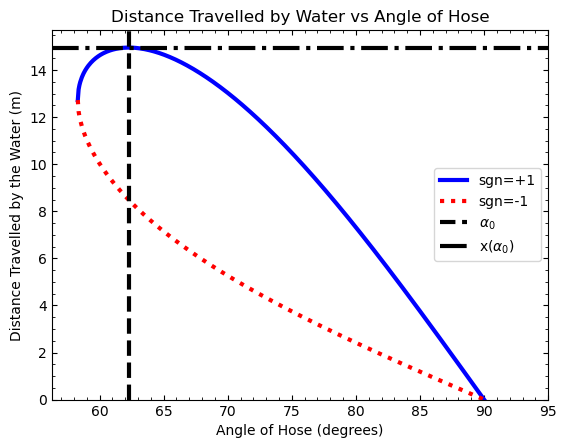

In [9]:
x=np.linspace(np.rad2deg(amin),90,500)
y=xalpha(x,10.3,16.7)
y2=xalpha(x,10.3,16.7,-1)

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x,y, label="sgn=+1",c='b',lw=3)
ax.plot(x,y2, label="sgn=-1",c='r', ls=":", lw=3)
ax.axvline(a0, c='k',lw=3,ls='--', label=r'$\alpha_0$')
ax.axhline(dist, c='k',lw=3,ls='-.', label=r'x($\alpha_0)$')

ax.set_xlim(np.rad2deg(amin)-2,95)
ax.set_ylim(0)
ax.set_xlabel("Angle of Hose (degrees)")
ax.set_ylabel('Distance Travelled by the Water (m)')
ax.set_title("Distance Travelled by Water vs Angle of Hose")
ax.legend()
ax.minorticks_on()

### Rant

Producing quality figures is somewhat subjective. Even so, the number of very low quality plots found in articles submitted for publication is appalling. Bad figures are easy to spot and it is also easy to avoid making them. This is particularly true when we use tools with good defaults, like matplotlib.

Or at least mostly good defaults. A change made a number of years ago now that I completely disagree with for scientific figures is how tick marks are handled. In your figure you should see that tick marks point outward from the plotting region and they only appear on the left and bottom axes. Though I greatly prefer them pointing inward, one could argue that this is a matter of taste.

On the other hand, not having tick marks on the right and top axes is atrocious (to put it mildly). In a scientific figure we are typically interested in the behavior of what we are plotting over the full range of the plot. Thus we want to be able to read off values of curves even if they are near the top or right hand side of the plot. Without tick marks on these axes this is extremely difficult, it makes reading plots much harder. I do not know the rationale for this change.

Due to this I will always change the behavior (back to that in previous versions of matplotlib). Fortunately, matplotlib allows you to control everything. There are a few ways to do this. I will use the `rc` interface for achieving my desired look. This globally changes the behavior for all plots. In all subsequent notebooks you will see the extra boilerplate to set up my preferences:
```python
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
```
I also pretty much always want the minor ticks turned on so I will also include
```python
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
```

As this is somewhat a matter of taste, it will not be enforced. However, I would encourage you to think about this and other choices whenever you produce a figure. There are many other choices, existing styles, *etc*. that satisfy the same goal of clear plots. Any of them could also be used. There are other default behaviors that could also be changed to improve plot quality if desired.

#### Online Figures

The discussion above and preferences I choose are based on the idea that a figure is going to appear in print. More and more often these days that is not the case. Further, a notebook is an "online" document so maybe it does not need to be treated like a "print" document. Many styles designed for online viewing are in common use (particularly in data science it seems). Matplotlib makes it fairly easy to select such a style for all plots and could be included in your "boiler plate". I will leave it to you to find out more about this if you are interested .... Regardless, the style of your plots must be such that for any feature that would appear in the upper portion and/or right hand side of the plot, we can easily read off its $x$ and $y$ values without having to imprecisely trace "by hand" or "by eye" across the figure to tick marks far from the feature.

## Member Participation

See Lab00 for instructions on turning in labs. We will follow this procedure the entire semester.

In the following cell enter the *Case ID* for each student in the group who participated in this lab. Again, see Lab00 for more details. It is expected that you have read and understood those details.

skv34 vwf5 sgg64